In [1]:
# start from scratch

In [2]:
# read pair of images
# get the largest window size
# prepare the grid
# run first pass as correlation only, pixel shifts, 
# we have to have full vector grid so we know how to interpolate
# interpolate to smaller grid
# deform images 
# repeat 2nd to N-1 passes using correlation only, pixel shifts
# last pass - subpixel localization

In [3]:
%pylab inline
from openpiv.tools import imread
from openpiv.pyprocess import get_coordinates, get_field_shape, fft_correlate_strided_images
from openpiv.pyprocess import moving_window_array

Populating the interactive namespace from numpy and matplotlib


In [4]:
a = imread('../data/karman_16Hz_000_A.jpg')
b = imread('../data/karman_16Hz_000_B.jpg')
a = a[150:450,200:500]
b = b[150:450,200:500]

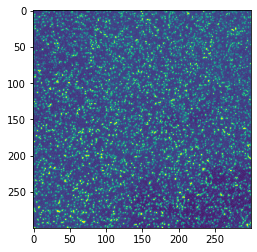

In [5]:
imshow(a)

In [6]:
window_size = 64
overlap = 32
aa = moving_window_array(a,window_size,overlap)
bb = moving_window_array(b,window_size,overlap)

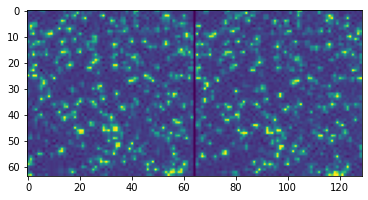

In [7]:
imshow(c_[aa[0,:,:],np.ones((window_size,1)),bb[0,:,:]])

In [8]:
corr = fft_correlate_strided_images(aa,bb,correlation_method='circular',normalized_correlation=True)

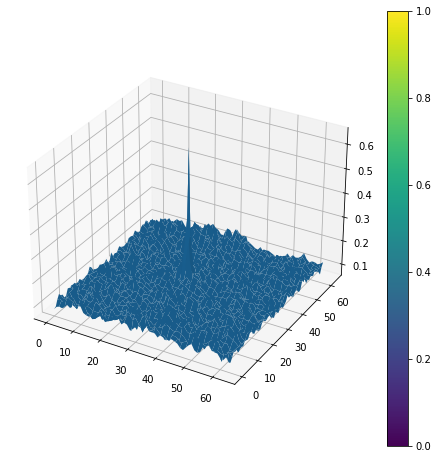

In [9]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
x,y = np.meshgrid(np.arange(64),np.arange(64))
surf = ax.plot_surface(x,y,corr[9,:,:])
fig.colorbar(surf)


In [10]:
from openpiv.pyprocess import find_first_peak

In [11]:
(i,j),s2n = find_first_peak(corr[-1,:,:])

In [12]:
i,j,s2n

(31, 30, 0.60825142947648)

In [13]:
x,y = get_coordinates(a.shape,window_size,overlap)

u = np.zeros_like(x)
v = np.zeros_like(y)

n_rows = x.shape[0]
n_cols = x.shape[1]

for k in range(n_rows):
    for m in range(n_cols):
        (i,j),s2n = find_first_peak(corr[k*n_cols+m,:,:])
        u[k, m], v[k, m] = j-32, -i+32

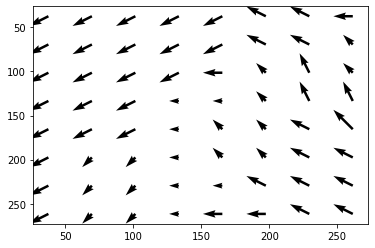

In [14]:
quiver(x,y,u,v)
gca().invert_yaxis()

In [15]:
from scipy.interpolate import griddata

In [16]:
xi,yi = get_coordinates(a.shape, window_size/2,overlap/2)
ui = griddata((x.flatten(),y.flatten()),u.flatten(),(xi.flatten(),yi.flatten()),method='cubic').reshape(xi.shape)
vi = griddata((x.flatten(),y.flatten()),v.flatten(),(xi.flatten(),yi.flatten()),method='cubic').reshape(xi.shape)

ui[np.isnan(ui)] = 0
vi[np.isnan(vi)] = 0

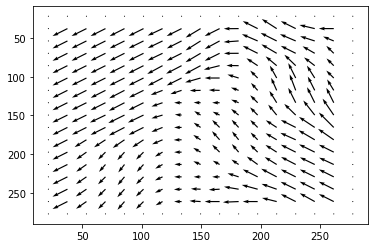

In [17]:
quiver(xi,yi,ui,vi)
gca().invert_yaxis()

In [18]:
from scipy.ndimage import map_coordinates

# xi,yi = get_coordinates(a.shape, window_size/2,overlap/2)
xp,yp = np.meshgrid(np.arange(a.shape[0]),np.arange(a.shape[1]))
up = griddata((x.flatten(),y.flatten()),u.flatten(),(xp.flatten(),yp.flatten()),method='cubic').reshape(xp.shape)
vp = griddata((x.flatten(),y.flatten()),v.flatten(),(xp.flatten(),yp.flatten()),method='cubic').reshape(xp.shape)

up[np.isnan(up)] = 0
vp[np.isnan(vp)] = 0

# a1 = map_coordinates(
#         a, ((yi + vi/2, xi - ui/2)), order=1, mode='nearest')
b1 = map_coordinates(
        a, ((yp - vp, xp + up)), order=1, mode='nearest')

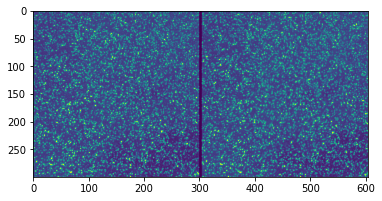

In [19]:
imshow(c_[b,np.zeros((300,5)),b1])

In [20]:
window_size //= 2
overlap //= 2
aa = moving_window_array(a,window_size,overlap)
bb = moving_window_array(b1,window_size,overlap)
corr = fft_correlate_strided_images(aa,bb,correlation_method='circular',normalized_correlation=True)

In [21]:
window_size

32

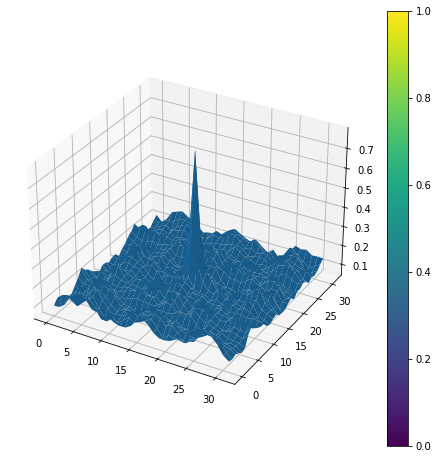

In [22]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
x,y = np.meshgrid(np.arange(window_size),np.arange(window_size))
surf = ax.plot_surface(x,y,corr[9,:,:])
fig.colorbar(surf)

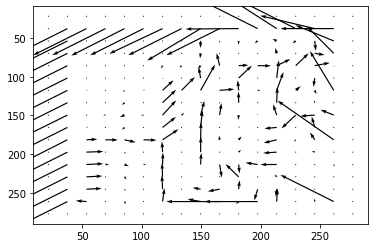

In [23]:
x,y = get_coordinates(a.shape,window_size,overlap)

u1 = np.zeros_like(x)
v1 = np.zeros_like(y)

n_rows = x.shape[0]
n_cols = x.shape[1]

for k in range(n_rows):
    for m in range(n_cols):
        (i,j),s2n = find_first_peak(corr[k*n_cols+m,:,:])
        u1[k, m], v1[k, m] = j-window_size/2, -i+window_size/2

    
quiver(x,y,ui+u1,vi+v1)
gca().invert_yaxis()

In [28]:
v1

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0., -1., -1.,
        -1., -1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0., -1., -1.,
        -1., -1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0., -1., -1.,
        -1., -1., -1.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0., -1., -1.,
        -2., -2., -1.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0., -1., -1.,
        -2., -2.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0., -1., -1.,
        -2., -2., -2.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0., -1., -1., -1.,
        -2., -2., -2.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0., -1., -1., -1., -1.,
        -